In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ColumnTransfer
* process of moving or mapping data from a specific source column (or feature) to a destination column (or feature) within a dataset, often during data preprocessing, feature engineering, or data integration

### Colunns
* numerical columns
* caategorical columns

 ## Features Engineering
It includes starting from numerical data preprocessing only

 ## Features Engineering Features
 * Manipulation / extraction
 * NDP
 * CDP
 * Feature Scaling (NDP)
 * Feature Selection
 * In column transfer at a time we can use numerical and categorical It can fix a single pipeline


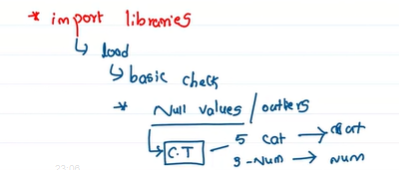

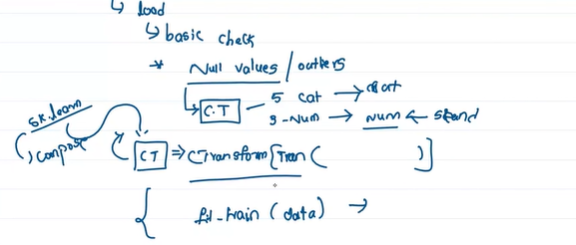

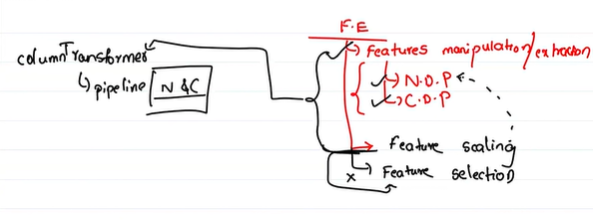

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/loan_approved.csv')

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# We are dropping the 2 columns in this data
df.drop(['Loan_ID', 'Dependents'], axis=1, inplace=True)

In [ ]:
df.shape

(614, 11)

In [ ]:
# separating the numerical columns
num_cols=df.select_dtypes(include='number').columns
print(num_cols)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [ ]:
# separating the categorical columns
cat_cols=df.select_dtypes(include='object').columns
print(cat_cols)

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')


# Import required libraries

In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
pre=ColumnTransformer(transformers=[('num',StandardScaler(),num_cols),
                             ('cat',OneHotEncoder(sparse_output=False),cat_cols)])


In [ ]:
pre
# transformer  is built

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                ('cat', OneHotEncoder(sparse_output=False),
                                 Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object'))])

In [ ]:
pr=pre.fit_transform(df)

In [ ]:
pr.shape

(614, 21)

In [ ]:
num=['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term']

In [ ]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols


Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

In [ ]:
pre=ColumnTransformer(transformers=[('num',StandardScaler(),num),
                             ('cat',OneHotEncoder(sparse_output=False),cat_cols)],
                      remainder='passthrough')


In [ ]:
new_df=pre.fit_transform(df)

In [ ]:
new_df.shape


(614, 21)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/banana_quality_dataset.csv')

In [ ]:
df

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Burro,Ecuador,3.50,Good,4.94,Ripe,21.06,2.49,27.95,196.35,2023-10-04,12.4,409.7,2029.9,173.0
996,997,Cavendish,Philippines,2.38,Processing,6.74,Overripe,16.10,2.00,12.39,165.55,2023-09-23,14.0,314.3,1330.7,180.5
997,998,Plantain,Ecuador,1.68,Processing,1.41,Green,17.17,2.28,16.56,210.08,2023-10-19,18.4,683.0,2955.4,189.9
998,999,Fehi,Guatemala,2.02,Processing,1.34,Green,17.03,2.88,26.31,162.50,2023-09-22,8.2,1362.7,1215.8,85.5


In [ ]:
df.drop(['sample_id',"harvest_date",],axis=1,inplace=True)

In [ ]:
df.quality_category.unique()

array(['Processing', 'Premium', 'Good', 'Unripe'], dtype=object)

In [ ]:
cat=[['Unripe','Processing','Good','Premium']]

In [ ]:
qua=['quality_category']

In [ ]:
df.columns

Index(['variety', 'region', 'quality_score', 'quality_category',
       'ripeness_index', 'ripeness_category', 'sugar_content_brix',
       'firmness_kgf', 'length_cm', 'weight_g', 'tree_age_years', 'altitude_m',
       'rainfall_mm', 'soil_nitrogen_ppm'],
      dtype='object')

In [ ]:
cat_cols=['variety','region','ripeness_category']

In [ ]:
num_cols=df.select_dtypes(include='number').columns


In [ ]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
pre=ColumnTransformer(transformers=[('num',StandardScaler(),num_cols),
                              ('xyz',OrdinalEncoder(categories=cat),qua),
                             ('cat',OneHotEncoder(sparse_output=False),cat_cols)],
                      remainder='passthrough')


In [ ]:
pre

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 Index(['quality_score', 'ripeness_index', 'sugar_content_brix', 'firmness_kgf',
       'length_cm', 'weight_g', 'tree_age_years', 'altitude_m', 'rainfall_mm',
       'soil_nitrogen_ppm'],
      dtype='object')),
                                ('xyz',
                                 OrdinalEncoder(categories=[['Unripe',
                                                             'Processing',
                                                             'Good',
                                                             'Premium']]),
                                 ['quality_category']),
                                ('cat', OneHotEncoder(sparse_output=False),
                                 ['variety', 'region', 'ripeness_category'])])

In [ ]:
new=pre.fit_transform(df)

In [ ]:
new.shape

(1000, 31)

In [ ]:
def column_transformer(df):
  num_cols=df.select_dtypes(include='number').columns
  cat_cols=df.select_dtypes(include='object').columns
  return ColumnTransformer(transformers=[('num',StandardScaler(),num_cols),
                             ('cat',OneHotEncoder(sparse_output=False),cat_cols)],
                      remainder='passthrough')


In [ ]:
pre1 =column_transformer(df)

In [ ]:
pre2 =column_transformer(df)

In [ ]:
pr=pre2.fit_transform(df)

In [ ]:
df_2=pd.DataFrame(pr)
df_2

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.072991,-0.554487,NaN,0.276642,0.432861,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.134412,-0.038732,-0.215309,0.276642,0.432861,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.393747,-0.554487,-0.940328,0.276642,0.432861,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.462062,0.251980,-0.308860,0.276642,0.432861,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.097728,-0.554487,-0.063289,0.276642,0.432861,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410130,-0.554487,-0.881859,0.276642,0.432861,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
610,-0.212557,-0.554487,-1.244368,-2.489775,0.432861,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
611,0.437174,-0.472404,1.246423,0.276642,0.432861,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
612,0.357064,-0.554487,0.474628,0.276642,0.432861,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
pre=pre1.fit_transform(df)

In [ ]:
df_1=pd.DataFrame(pre)
df_1

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-1.082350,-1.102626,-0.829400,0.638798,0.271721,-0.362627,0.541038,-1.557632,0.828641,1.478299,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.083531,0.118602,-0.878570,1.073376,1.086240,-0.086672,-1.108701,-1.037919,0.711835,0.100944,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2.043584,1.254230,1.388129,-0.835662,0.927522,1.231846,1.308358,1.225172,-1.385170,0.808285,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.471961,0.769163,-0.868736,0.468071,-1.186389,-0.548225,0.406757,0.998792,1.545781,-0.216332,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.213007,1.025963,-0.794982,0.281824,-1.203830,1.284148,-1.166250,-0.462490,0.290520,0.472345,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.914108,0.512362,1.250456,-0.168275,1.407163,0.643306,0.291659,-0.734754,0.100866,1.280467,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
996,-0.157518,1.539564,-1.188335,-0.548530,-1.306735,0.016506,0.598587,-0.958090,-1.138442,1.420442,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
997,-1.452283,-1.502094,-0.662225,-0.331241,-0.579424,0.922720,1.442639,-0.094945,1.741284,1.595878,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
998,-0.823397,-1.542040,-0.731062,0.134378,1.121123,-0.045564,-0.514028,1.496265,-1.342099,-0.352575,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
